# Analysis

In [297]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
import os
import glob

import sentida
from sentida import Sentida
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from helper_functions import *

[nltk_data] Downloading package punkt to /Users/emmaolsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [298]:
df = pd.read_csv('speeches_df.csv')
years = df['year'].sort_values()

In [299]:
# add a column for number of words in each speech   
df['num_words'] = df['transcripts'].apply(lambda x: len(x.split()))

In [300]:
from collections import Counter
df['num_unique_words'] = df['transcripts'].apply(lambda x: len(Counter(x.split())))

In [301]:
df

,transcripts,year,minister,Party,Wing,num_words,num_unique_words
0,aften glædeligt nytår 1996 år danmark situatio...,1997,Poul Nyrup Rasmussen,Socialdemokratiet,Red,798,552
1,aften torsdag december sad gulvet stue valby h...,2015,Helle Thorning Schmidt,Socialdemokratiet,Red,722,487
2,tilbragte dagene jul israel officielt besøg in...,1994,Poul Nyrup Rasmussen,Socialdemokratiet,Red,715,510
3,godaften glædeligt nytår år 50 år fred danmark...,1995,Poul Nyrup Rasmussen,Socialdemokratiet,Red,784,565
4,godaften uger deltog mindehøjtideligheden nels...,2014,Helle Thorning Schmidt,Socialdemokratiet,Red,702,479
5,godaften danskere grundlæggende optimister tro...,2013,Helle Thorning Schmidt,Socialdemokratiet,Red,830,515
6,godaften måneder danmark regering regering trå...,2012,Helle Thorning Schmidt,Socialdemokratiet,Red,797,509
7,godaften første dag nye år spændte år bringe å...,2009,Anders Fogh Rasmussen,Venstre,Blue,707,478
8,godaften år hundrede år sønderjylland genforen...,2020,Mette Frederiksen,Socialdemokratiet,Red,719,499
9,aften taget hul år bedre gamle 2020 hårdt år u...,2021,Mette Frederiksen,Socialdemokratiet,Red,924,695


## 0. Making dataframe subsets

In [302]:
socialdemokratiet_df = df[df["Party"]=="Socialdemokratiet"]
venstre_df = df[df["Party"]=="Venstre"]
konservative_df = df[df["Party"]=="Det Konservative Folkeparti"]
radikale_df = df[df["Party"]=="Radikale Venstre"]

red_df = df[df["Wing"]=="Red"]
red_df.name = "Socialist Ministers"

blue_df = df[df["Wing"]=="Blue"]
blue_df.name = "Liberal Ministers"

## 1. Word length over time - do the speeches get longer or shorter over time?


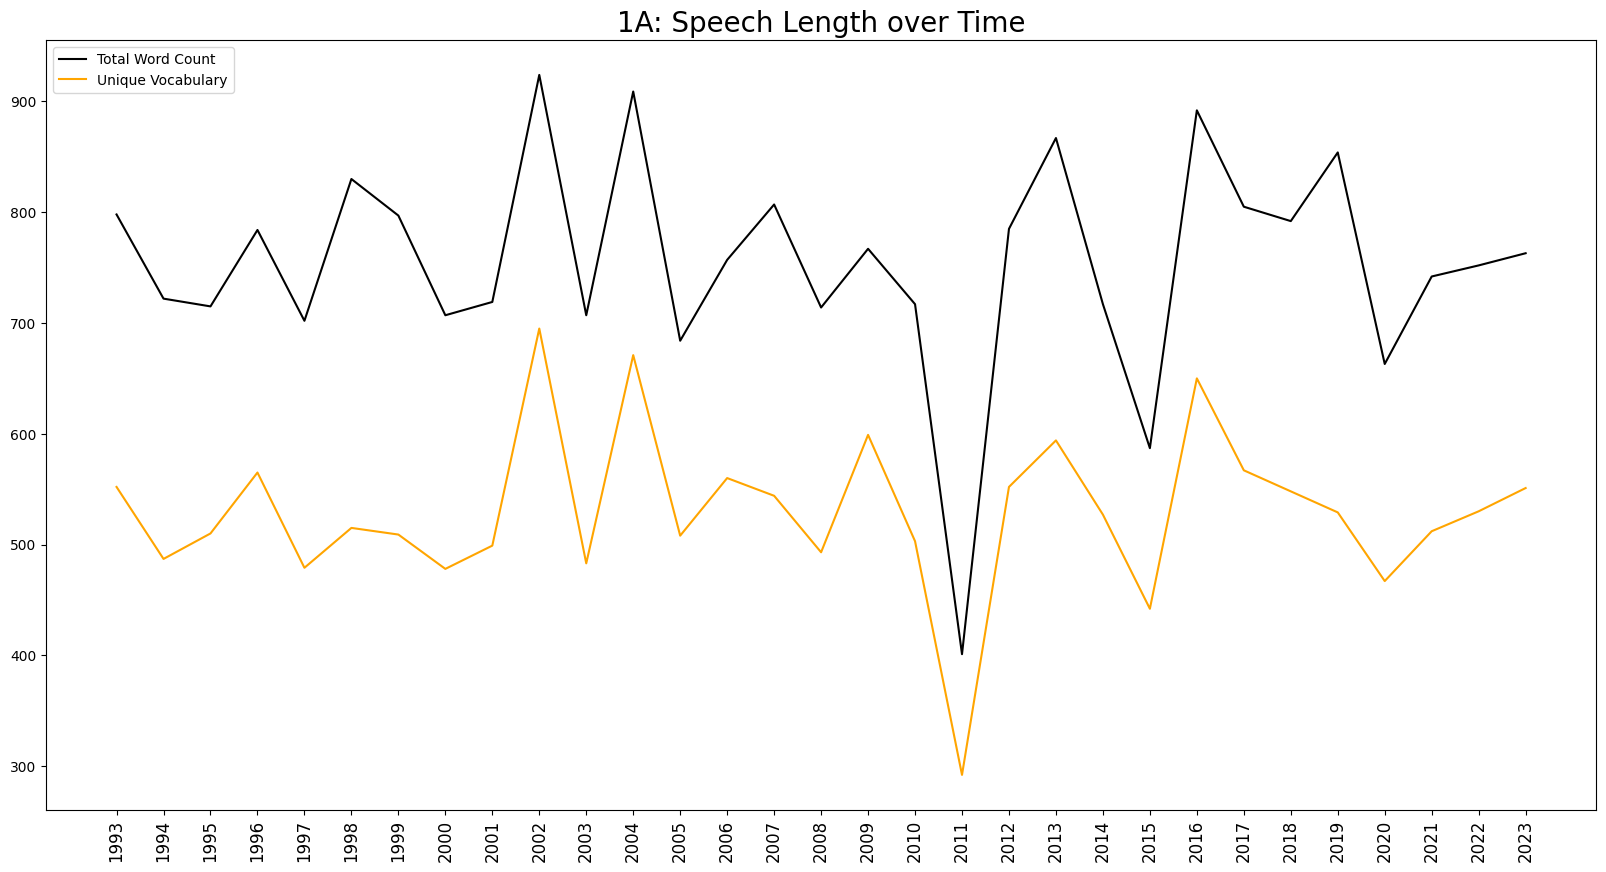

In [303]:
# Extract the 'year' column from the DataFrame
years = df['year'].sort_values()
x = years

# Get the data for the two lines
y1 = df['num_words']
y2 = df['num_unique_words']

# Create a figure and set the size
fig = plt.figure(figsize=(20, 10))

# Plot the first line
plt.plot(x, y1, color='black', label='Total Word Count')

# Plot the second line
plt.plot(x, y2, color='orange', label='Unique Vocabulary')

# Add a legend and specify the location of the legend
plt.legend(loc='upper left')

# Add x-axis labels
plt.xticks(x, x, rotation=90, fontsize=12, ha='center')

# Add a title
plt.title("1A: Speech Length over Time", fontsize=20)

# Show the plot
plt.show()


## 2. Top 25 words

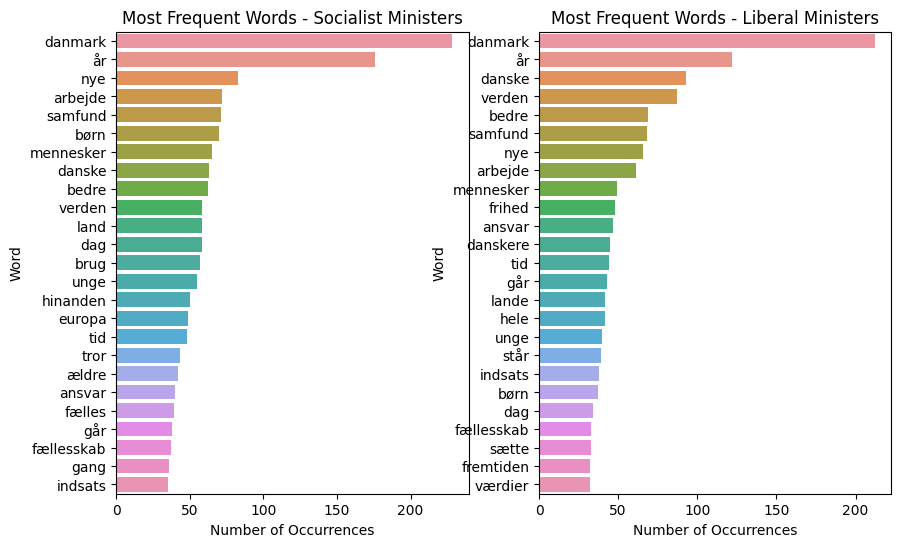

In [304]:
double_plot_word_counts(red_df, blue_df, 25)

## 3. Sentiment Analysis Using Sentida
Using Sentida2 for Python 
https://github.com/Guscode/Sentida2/blob/main/sentida_totorial.ipynb

In [305]:
import sentida
from sentida import Sentida
!pip install spacy
# import spacy

In [306]:
# sentiment score in loop
sent_scores = []

for text in df['transcripts']:
    sentiment_score = Sentida().sentida(text,output = "total")
    sent_scores.append(sentiment_score)

In [307]:
# append sent_cores to df as new col called 'sentiment_score'
df['sentiment_score'] = sent_scores
years = df['year'].sort_values()

In [308]:
df.sort_values(by='year',inplace=True)

In [281]:
# year with highest sentiment score
df.sort_values(by='sentiment_score',ascending=False).head(1)
# year with lowest sentiment score
df.sort_values(by='sentiment_score',ascending=True).head(1)


,transcripts,year,minister,Party,Wing,num_words,num_unique_words,sentiment_score
18,godaften nytår præget tragedie kender fulde om...,12005,Anders Fogh Rasmussen,Venstre,Blue,401,292,-1.209074


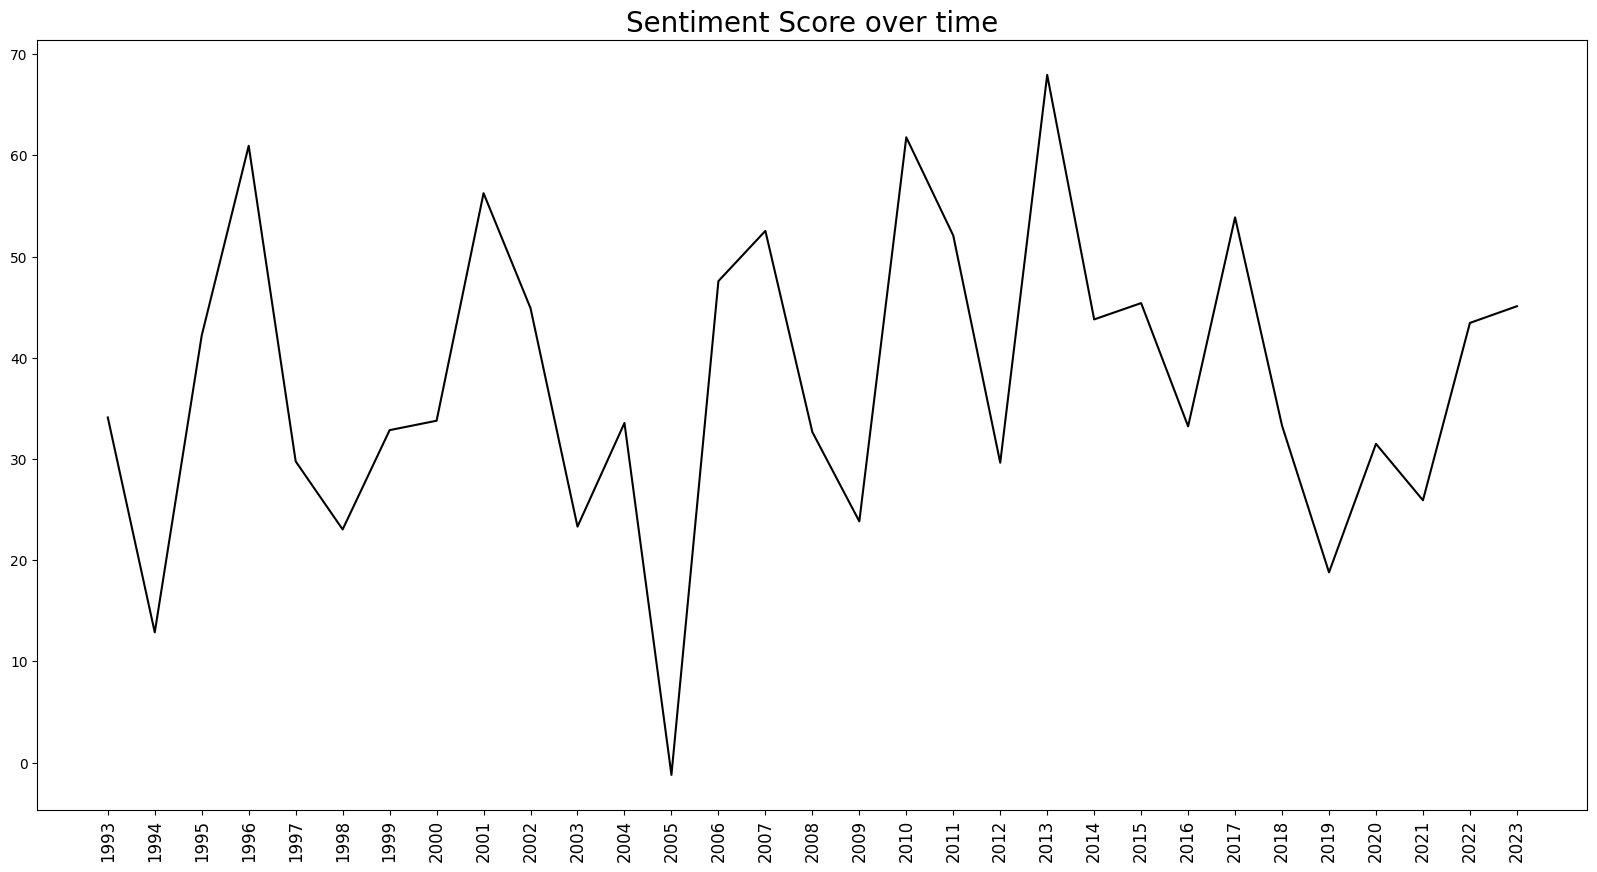

In [314]:
# Extract the 'year' and 'Wing' columns from the DataFrame
x = df['year']
y = df['sentiment_score']

# Create a figure and set the size
fig = plt.figure(figsize=(20, 10))

# Plot the data and specify the color of the line
plt.plot(x, y, color='black')
plt.xticks(x, x, rotation=90, fontsize=12, ha='center')
plt.title("Sentiment Score over time", fontsize=20)

# Show the plot
plt.show()

## Word Clouds
See colour maps here: https://www.kaggle.com/code/niteshhalai/wordcloud-colormap

In [283]:
with open("stopord.txt", 'r') as f_object:
    stop_words = f_object.read().split()

In [284]:
# string containing all speeches 
full = ' '.join(df['transcripts'])
# concat all text in "transcripts" col where wing is red 
red_df = ' '.join(df[df['Wing']=='Red']['transcripts'])
blue_df = ' '.join(df[df['Wing']=='Blue']['transcripts'])


# concat all text in "transcripts" col where value in minister is something specific"
poul_nyrup = ' '.join(df[df['minister']=='Poul Nyrup']['transcripts'])
helle_t = ' '.join(df[df['minister']=='Helle Thorning']['transcripts'])

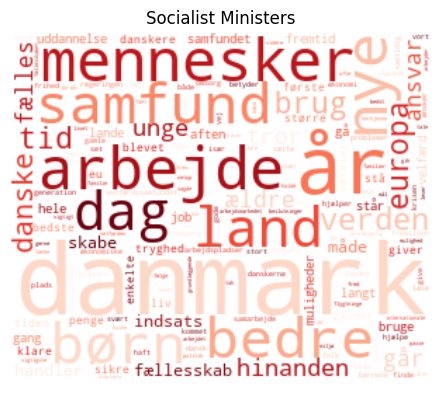

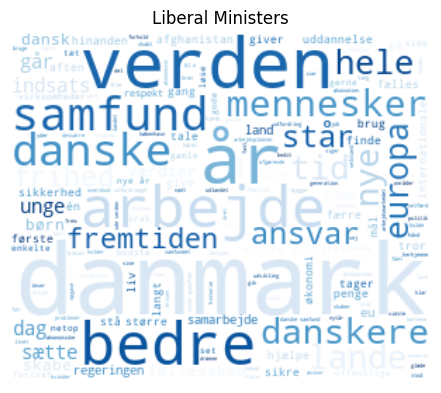

In [285]:
word_cloud('Socialist Ministers',red_df,'Reds',25)
word_cloud('Liberal Ministers',blue_df,'Blues',25)

In [286]:
word_cloud('Poul Nyrup',poul_nyrup,'Blues',30)
word_cloud('Helle Thorning',helle_t,'Reds',30)

ValueError: We need at least 1 word to plot a word cloud, got 0.

## Lix Score

In [ ]:
speeches_punct = {}

for file in all_files:
    loaded_file = opentxtfile(file)
    # Remove all punctuation except for periods
    loaded_file = loaded_file.translate(str.maketrans('', '', string.punctuation.replace('.', '')))
    filename = file.split('/')[1].split('.')[0]
    speeches_punct.update({filename: loaded_file})

In [ ]:
# note that this time I do not remove stop words
df_withpunct = pd.DataFrame.from_dict(speeches_punct, orient='index', columns=['transcripts'])
df_withpunct

,transcripts
2020_mette_frederiksen,Godaften.I år er det hundrede år siden Sønderj...
2001_poul_nyrup,Godaften – og godt nytår.I oktober besøgte jeg...
2002_anders_fogh,God aften – og godt nytårDet er første gang at...
2005_anders_fogh,GodaftenDette nytår er præget af en tragedie v...
2000_poul_nyrup,Godaften – her på den første dag i det nye årt...
2015_helle_thorning,God aften.En torsdag i december sad jeg på gul...
2013_helle_thorning,Godaften.Vi danskere er grundlæggende optimist...
2004_anders_fogh,Godaften – og godt nytårFor nogle måneder side...
2003_anders_fogh,Godaften – og godt nytårDe fleste danske famil...
1998_poul_nyrup,Godaften.1998 bliver et skelsættende år for Da...


In [ ]:
df_withpunct['year'] = df_withpunct.index # give first col in df a header
df_withpunct['year'] = df_withpunct['year'].str.replace(r'\D', '') # remove everything from year column except for numbers
df_withpunct['year'] = pd.to_numeric(df_withpunct['year'], downcast='integer')

df_withpunct['minister']=df_withpunct.index
# remove all non-alphabetic characters from minister col
df_withpunct['minister'] = df_withpunct['minister'].str.replace(r'\d', '')
# remove underscores from minister col with space
df_withpunct['minister'] = df_withpunct['minister'].str.replace('_', ' ')

/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_35369/3830698075.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_withpunct['year'] = df_withpunct['year'].str.replace(r'\D', '') # remove everything from year column except for numbers
/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_35369/3830698075.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_withpunct['minister'] = df_withpunct['minister'].str.replace(r'\d', '')


In [ ]:
df_withpunct

In [ ]:
# append the lix_score() function to all text in 'transcripts' column in df and append to new col called 'lix_score'
df_withpunct['lix_score'] = df_withpunct['transcripts'].apply(lix_score)

#years = df_withpunct['year'].sort_values()
df_withpunct.sort_values(by='year',inplace=True)

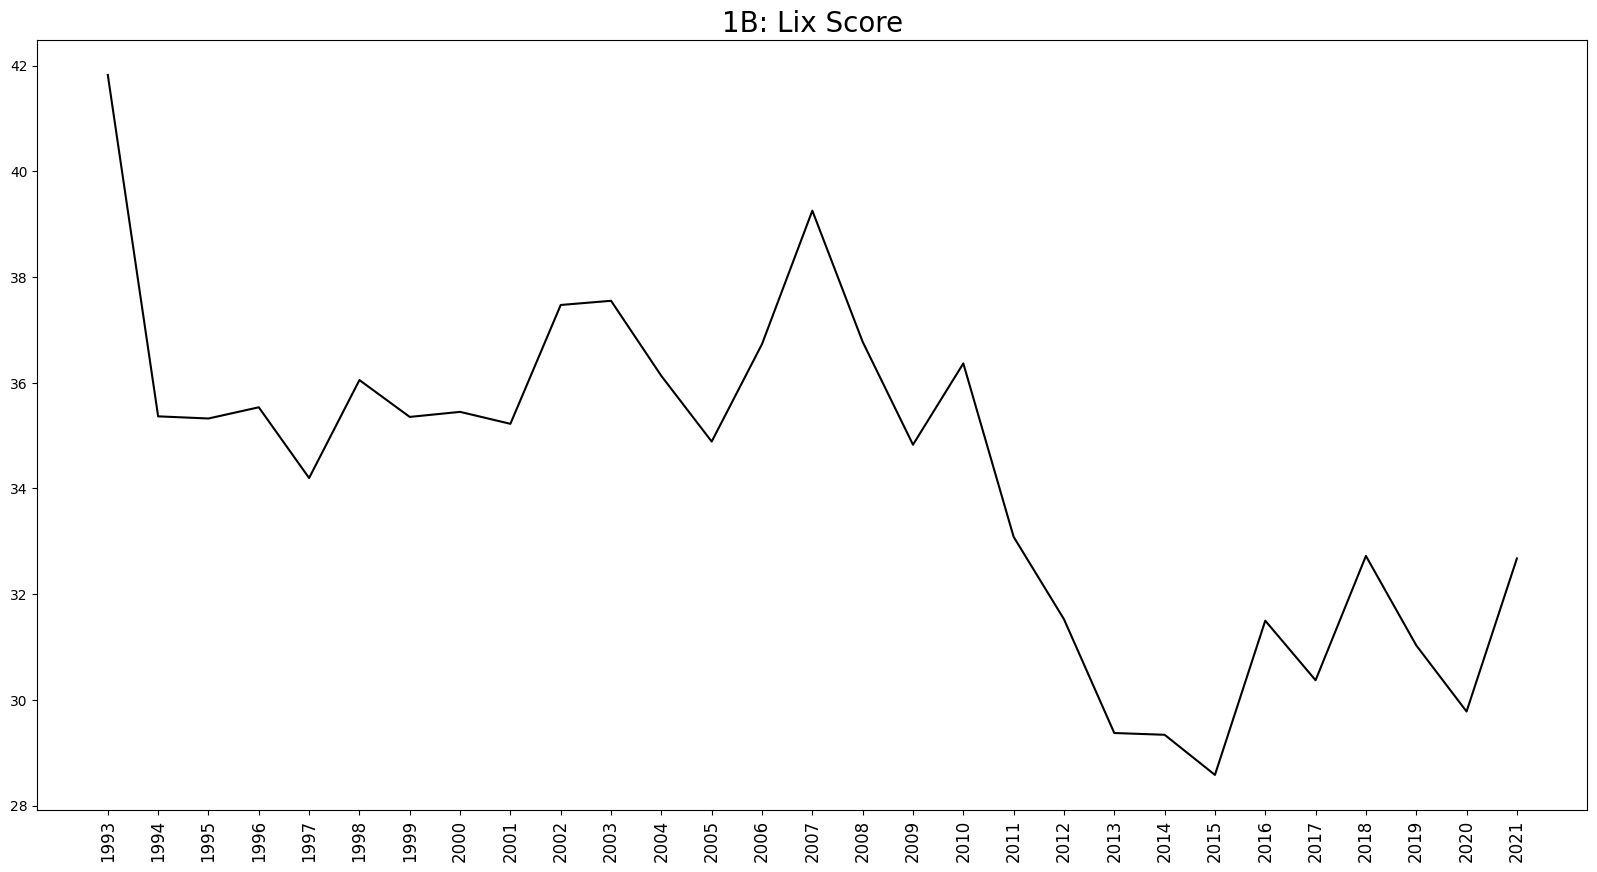

In [ ]:
# Extract the 'year' column from the DataFrame
years = df_withpunct['year'].sort_values()
x = years
y = df_withpunct['lix_score']

# Create a figure and set the size
fig = plt.figure(figsize=(20, 10))

# Plot the first line
plt.plot(x, y, color='black', label='Lix Score')

# Add x-axis labels
plt.xticks(x, x, rotation=90, fontsize=12, ha='center')

# Add a title
plt.title("1B: Lix Score", fontsize=20)

# Show the plot
plt.show()


# Test only (not used): Use of personal pronouns (oops, stop words should not be removed this time!)

In [287]:
first_person_pronouns = ["jeg","mig","min","vi","os", "vores"]

In [318]:
# Join the pronouns into a single string
pronouns_pattern = '|'.join(first_person_pronouns)

# Define a function that counts the number of occurrences of the pronoun pattern
def count_first_person_pronouns(text):
    # Use the count() method to count the occurrences of the pronoun pattern
    count = text.count(pronouns_pattern)
    return count

# Use the apply() method to apply the function to the transcripts column
df['first_person_pronoun_count'] = df['transcripts'].apply(count_first_person_pronouns)


In [319]:
df

,transcripts,year,minister,Party,Wing,num_words,num_unique_words,sentiment_score,pronoun_count,first_person_pronoun_count
16,godaften par år omsider begynde tro lysnede be...,1993,Poul Schlueter,Det Konservative Folkeparti,Blue,767,599,34.103598,NaN,0
2,tilbragte dagene jul israel officielt besøg in...,1994,Poul Nyrup Rasmussen,Socialdemokratiet,Red,715,510,12.874233,NaN,0
3,godaften glædeligt nytår år 50 år fred danmark...,1995,Poul Nyrup Rasmussen,Socialdemokratiet,Red,784,565,42.213122,NaN,0
30,nejgodaften glædeligt nytår skriver 1996 år år...,1996,Poul Nyrup Rasmussen,Socialdemokratiet,Red,763,551,60.946455,NaN,0
0,aften glædeligt nytår 1996 år danmark situatio...,1997,Poul Nyrup Rasmussen,Socialdemokratiet,Red,798,552,29.768095,NaN,0
29,godaften 1998 skelsættende år danmark år dansk...,1998,Poul Nyrup Rasmussen,Socialdemokratiet,Red,752,530,23.041534,NaN,0
28,godaften mennesker nytåret naturlig anledning ...,1999,Poul Nyrup Rasmussen,Socialdemokratiet,Red,742,512,32.853280,NaN,0
25,godaften første dag nye årtusinde sandelig ble...,2000,Poul Nyrup Rasmussen,Socialdemokratiet,Red,792,548,33.783122,NaN,0
24,godaften nytår oktober besøgte sydkorea mødte ...,2001,Poul Nyrup Rasmussen,Socialdemokratiet,Red,805,567,56.265820,NaN,0
27,aften nytår første gang statsminister henvende...,2002,Anders Fogh Rasmussen,Venstre,Blue,663,467,44.899048,NaN,0
